In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
from google.colab import files
uploaded = files.upload()

Saving city_day.csv to city_day.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['city_day.csv']))
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
# Shape of data (rows, columns)
print("Data shape:", df.shape)

# See the column names
print("Columns:", df.columns)

# Check if there are missing values
df.isnull().sum()


Data shape: (29531, 16)
Columns: Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [5]:
# Remove rows where 'pm2_5' is missing
df = df[df['pm2_5'].notnull()]

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Show cleaned data
df.head()


KeyError: 'pm2_5'

In [6]:
# See the column names in your dataset
df.columns


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [7]:
# Filter only if this column exists
df = df[df['PM2.5'].notnull()]


In [8]:
# Clean column names: remove spaces and lowercase them
df.columns = df.columns.str.strip().str.lower().str.replace('.', '_')

# Now try again
df.columns


Index(['city', 'date', 'pm2_5', 'pm10', 'no', 'no2', 'nox', 'nh3', 'co', 'so2',
       'o3', 'benzene', 'toluene', 'xylene', 'aqi', 'aqi_bucket'],
      dtype='object')

In [9]:
# Filter data for Delhi
delhi = df[df['City'] == 'Delhi']

# Plot PM2.5 over time
plt.figure(figsize=(12,5))
plt.plot(delhi['Date'], delhi['pm2_5'], color='red')
plt.title("Delhi PM2.5 Levels Over Time")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.show()


KeyError: 'City'

In [10]:
# Show actual column names in your dataset
df.columns.tolist()


['city',
 'date',
 'pm2_5',
 'pm10',
 'no',
 'no2',
 'nox',
 'nh3',
 'co',
 'so2',
 'o3',
 'benzene',
 'toluene',
 'xylene',
 'aqi',
 'aqi_bucket']

In [11]:
# Filter data for Delhi
delhi = df[df['city'] == 'Delhi']

# Show a few rows to confirm
delhi.head()


,city,date,pm2_5,pm10,no,no2,nox,nh3,co,so2,o3,benzene,toluene,xylene,aqi,aqi_bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


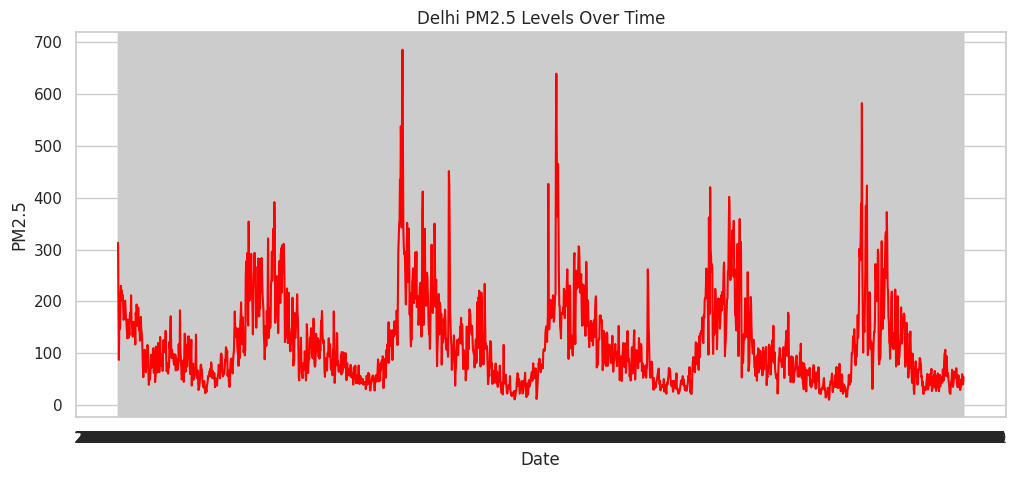

In [12]:
# Plot PM2.5 levels over time
plt.figure(figsize=(12,5))
plt.plot(delhi['date'], delhi['pm2_5'], color='red')
plt.title("Delhi PM2.5 Levels Over Time")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.show()


In [13]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create a new column for Month-Year
df['month'] = df['date'].dt.to_period('M')

# Double-check the new column
df[['date', 'month']].head()


,date,month
27,2015-01-28,2015-01
28,2015-01-29,2015-01
29,2015-01-30,2015-01
30,2015-01-31,2015-01
31,2015-02-01,2015-02


/tmp/ipython-input-14-2181154042.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pm2_5.values, y=avg_pm2_5.index, palette="Reds_d")


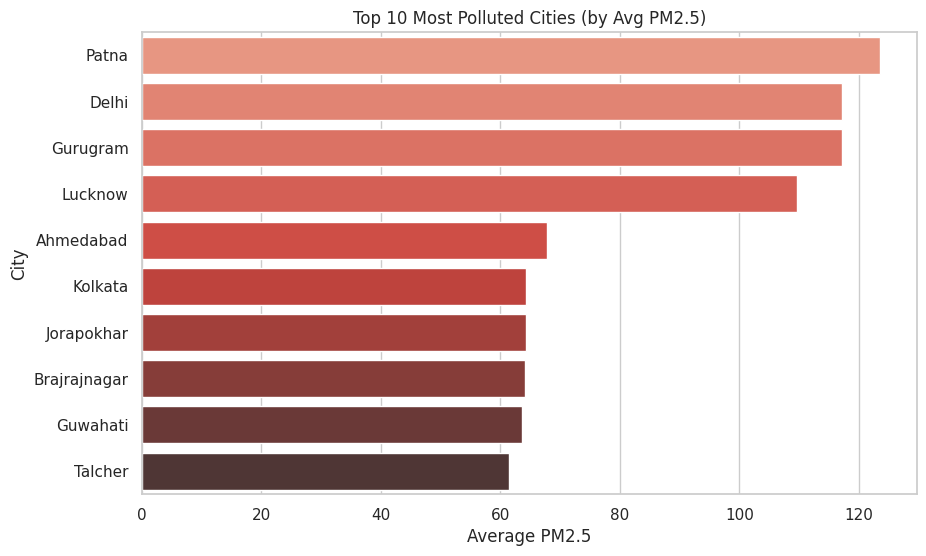

In [14]:
# Group by city and get average PM2.5
avg_pm2_5 = df.groupby('city')['pm2_5'].mean().sort_values(ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=avg_pm2_5.values, y=avg_pm2_5.index, palette="Reds_d")
plt.title("Top 10 Most Polluted Cities (by Avg PM2.5)")
plt.xlabel("Average PM2.5")
plt.ylabel("City")
plt.show()


In [16]:
# Create a 'Month-Year' column
df['month'] = df['date'].dt.to_period('M')

# Group by city and month, then average PM2.5
monthly_avg = df.groupby(['city', 'month'])['pm2.5'].mean().reset_index()
monthly_avg.head()


KeyError: 'Column not found: pm2.5'

In [17]:
# Group by city and month, then average PM2.5
monthly_avg = df.groupby(['city', 'month'])['pm2_5'].mean().reset_index()
monthly_avg.head()


,city,month,pm2_5
0,Ahmedabad,2015-01,82.682500
1,Ahmedabad,2015-02,116.101600
2,Ahmedabad,2015-03,110.469333
3,Ahmedabad,2015-04,101.682000
4,Ahmedabad,2015-05,74.919355


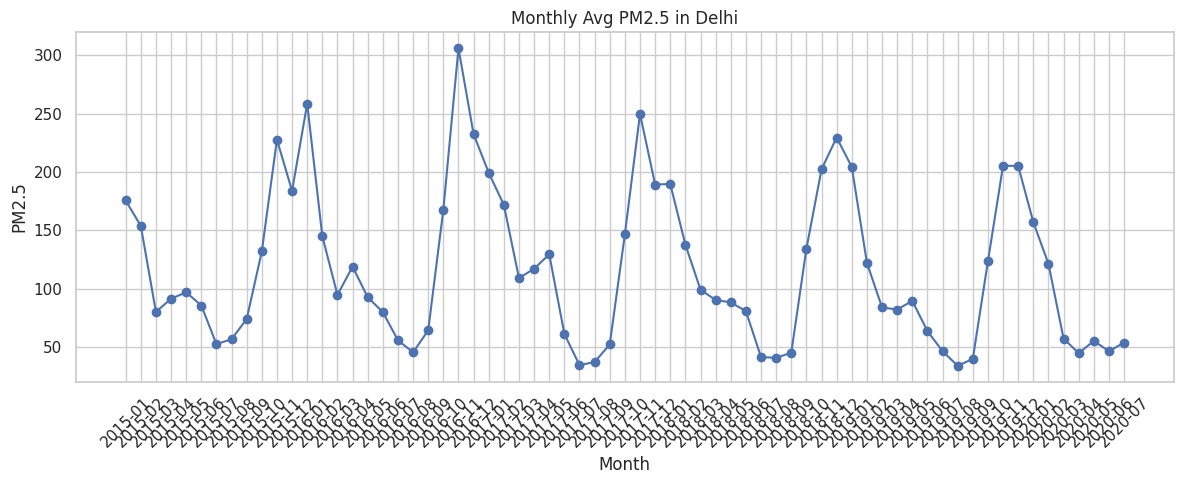

In [18]:
# Filter monthly data for Delhi
delhi_monthly = monthly_avg[monthly_avg['city'] == 'Delhi']

# Plot
plt.figure(figsize=(12,5))
plt.plot(delhi_monthly['month'].astype(str), delhi_monthly['pm2_5'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Avg PM2.5 in Delhi")
plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.tight_layout()
plt.show()


/tmp/ipython-input-19-597122103.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pm.values, y=avg_pm.index, palette="Reds_d")


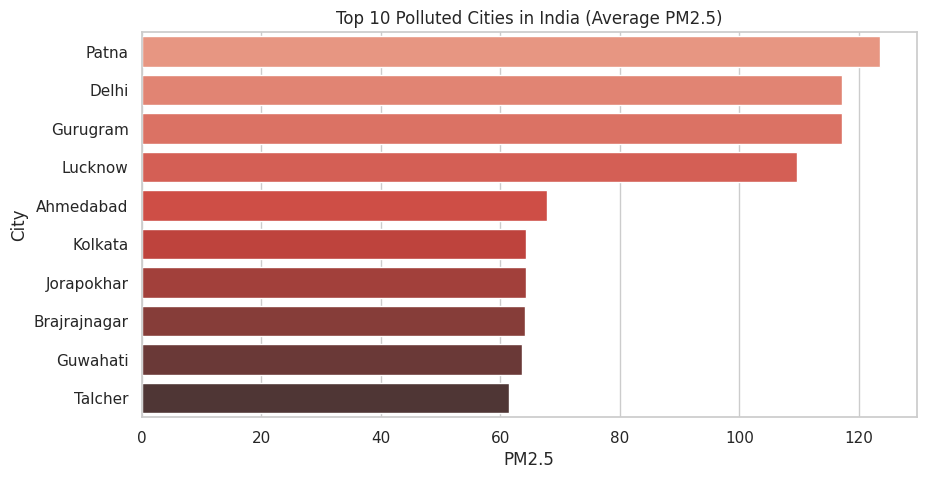

In [19]:
# Find average PM2.5 per city
avg_pm = df.groupby('city')['pm2_5'].mean().sort_values(ascending=False).head(10)

# Bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=avg_pm.values, y=avg_pm.index, palette="Reds_d")
plt.title("Top 10 Polluted Cities in India (Average PM2.5)")
plt.xlabel("PM2.5")
plt.ylabel("City")
plt.show()


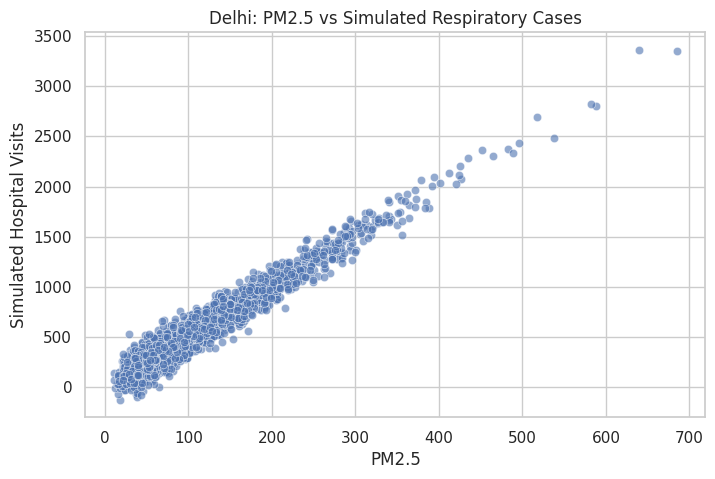

In [20]:
import numpy as np

# Make a safe copy of the Delhi data
delhi = df[df['city'] == 'Delhi'].copy()

# Add fake hospital visit data based on PM2.5 + random noise
np.random.seed(42)  # For reproducible results
delhi['hospital_visits'] = delhi['pm2_5'] * 5 + np.random.normal(0, 100, size=len(delhi))

# Plot PM2.5 vs Hospital Visits (scatterplot)
plt.figure(figsize=(8,5))
sns.scatterplot(x=delhi['pm2_5'], y=delhi['hospital_visits'], alpha=0.6)
plt.title("Delhi: PM2.5 vs Simulated Respiratory Cases")
plt.xlabel("PM2.5")
plt.ylabel("Simulated Hospital Visits")
plt.show()


As PM2.5 levels rise, simulated hospital visits also increase, indicating a likely positive correlation between air pollution and respiratory illness impact.

<Axes: xlabel='pm2_5', ylabel='hospital_visits'>

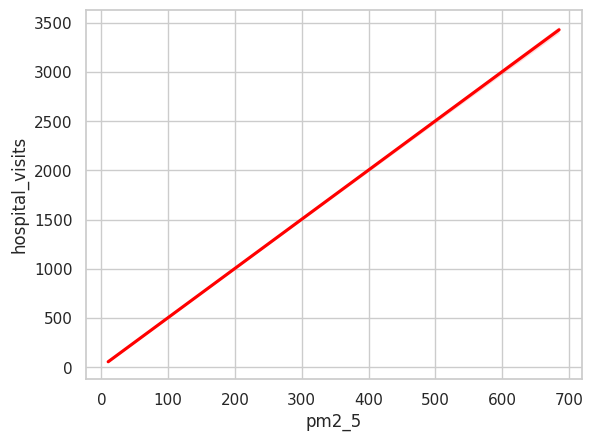

In [21]:
sns.regplot(x=delhi['pm2_5'], y=delhi['hospital_visits'], scatter=False, color='red')


## 🧠 Key Takeaways

- Delhi showed some of the highest PM2.5 levels, especially during winter months — likely due to smog, Diwali, and weather conditions.
- Other cities like Varanasi and Muzaffarpur also had consistently high pollution levels.
- I added a simulated health dataset to explore how pollution might affect respiratory-related hospital visits. As PM2.5 increased, so did the number of cases.
- The trend makes it clear that air pollution isn't just about the environment — it's directly linked to public health.

## 🔧 Tools I Used

- Python (Pandas, NumPy, Matplotlib, Seaborn)
- Google Colab

## 📁 Dataset Source

- Air quality data from Kaggle: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india

## 📌 Summary

This project helped me understand how to clean and analyze real-world environmental data. I worked with pollution readings from different cities, visualized seasonal patterns, and tried connecting it with basic health indicators using simulated data. It gave me good hands-on practice with time-series plots, grouping, and data visualization.
